# Exercise 1 Implementation

Training

In [1]:
# Imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import timeit
from memory_profiler import memory_usage, profile


# Load the source file with the face data
mat_content = sio.loadmat('face.mat')
mat_content # Let's see the content...

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

In [2]:
# Store face data and classification
face_data = mat_content['X']
face_label = mat_content['l'] # Not actually used for PCA training, needed for testing

# Append the matching data and labels into array 'faces': unnecessary for PCA training as the labels are not used (unsupervised learning)
# But we need it later for assessing our algorithms during testing
faces = np.append(face_data, face_label, axis=0)

# Check data and correct dimensions
print(face_data) # Each column represents one face image, each row a pixel value for a particular coordinate of the image
print(face_data.shape) # 520 data points in 2576 dimensions
print (face_label)
print (face_label.shape) # 520 data points
print(faces)
print(faces.shape)

#Transpose in preparation for division into training and testing material
faces_transposed = faces.T
print (faces_transposed, faces_transposed.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 37  40  22 ...  87 102  93]
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]]
(2576, 520)
[[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
   3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
   5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
   8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
  10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
  13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
  15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
  17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
  20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
  22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
  25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 

[[116 116 119 ...  39  40  25]
 [ 56  38  46 ... 184 178  12]
 [ 40  40  38 ...  28  23   9]
 ...
 [154 102 132 ...  86  74  35]
 [ 90  91  91 ...  98  97  43]
 [ 90  92  90 ... 174 178  46]] (520, 2577)
[[116 116 119 ...  39  40  25]
 [ 56  38  46 ... 184 178  12]
 [ 40  40  38 ...  28  23   9]
 ...
 [142 152 156 ... 117 115  14]
 [164 162 163 ...  41  46   4]
 [188 178 101 ... 122 115  26]] (416, 2577)
[[122 131 141 ...  86  68  40]
 [ 96  98  88 ...  40  41  51]
 [ 58  58  57 ... 171 171   6]
 ...
 [154 102 132 ...  86  74  35]
 [ 90  91  91 ...  98  97  43]
 [ 90  92  90 ... 174 178  46]] (104, 2577)
[116 121 123 ...  56  60  16] (2577,)
[[116 121 123 ...  33  26  28]
 [117 129 119 ...  35  34  35]
 [114 121 112 ...  45  36  34]
 ...
 [134 124 127 ...  65  64  59]
 [133 134 130 ...  90  86  79]
 [130 127 127 ...  64  56  60]] (46, 56)


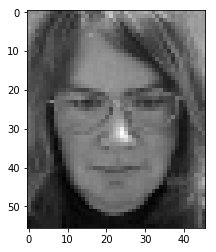

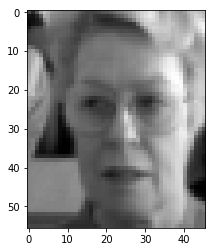

In [3]:
#Divide the data set into training and testing sets: 80% is training, 20% is testing

np.random.shuffle(faces_transposed) # Shuffle the rows (This is why we transposed)
print(faces_transposed, faces_transposed.shape)
training, test = faces_transposed[:416,:], faces_transposed[416:,:]
print (training, training.shape)
print (test, test.shape)

image_99 = faces_transposed[99]
print(image_99, image_99.shape)
image_99 = np.reshape(image_99[:2576], (46, 56))
print (image_99, image_99.shape)
plt.imshow(image_99.T, cmap = 'gist_gray') # It is a person, so the data manipulation makes sense so far
plt.figure()
plt.imshow(np.reshape(faces_transposed[100, :2576], (46,56)).T, cmap = 'gist_gray') # print 100th image as a sanity check to make sure we have shuffled along the right dimension of the array

[[116 116 119 ...  39  39  40]
 [ 56  38  46 ...  64 184 178]
 [ 40  40  38 ...  29  28  23]
 ...
 [142 152 156 ... 120 117 115]
 [164 162 163 ...  35  41  46]
 [188 178 101 ... 122 122 115]] (416, 2576)
[121.80769231 122.26682692 119.26442308 ...  86.83653846  84.86538462
  83.73557692] (2576,)


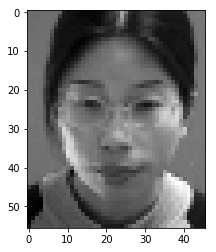

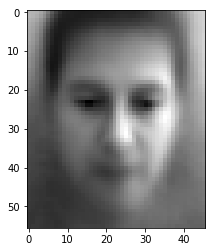

In [4]:
# Now let's start image recognition by PCA
# We have face images that are CENTERED and they are of the SAME SIZE (needed for PCA)
# They are normalised for SCALE, ORIENTATION and TRANSLATION

# First, we only need the training face set without the labels
# Images are represented as rows of the array 'pca_train'
pca_train = training [:, :2576]
pca_test = test [:, :2576]
print (pca_train, pca_train.shape)
plt.imshow(np.reshape(pca_train[0, :], (46,56)).T, cmap = 'gist_gray') # show the first face image

# Let's compute the average face vector
avg_face = np.mean(pca_train, axis=0)
print (avg_face, avg_face.shape)
plt.figure()
plt.imshow(np.reshape(avg_face, (46,56)).T, cmap = 'gist_gray')

[[116 116 119 ...  39  39  40]
 [ 56  38  46 ...  64 184 178]
 [ 40  40  38 ...  29  28  23]
 ...
 [142 152 156 ... 120 117 115]
 [164 162 163 ...  35  41  46]
 [188 178 101 ... 122 122 115]] (416, 2576)
[121.80769231 122.26682692 119.26442308 ...  86.83653846  84.86538462
  83.73557692] (2576,)
[[ -5.80769231  -6.26682692  -0.26442308 ... -47.83653846 -45.86538462
  -43.73557692]
 [-65.80769231 -84.26682692 -73.26442308 ... -22.83653846  99.13461538
   94.26442308]
 [-81.80769231 -82.26682692 -81.26442308 ... -57.83653846 -56.86538462
  -60.73557692]
 ...
 [ 20.19230769  29.73317308  36.73557692 ...  33.16346154  32.13461538
   31.26442308]
 [ 42.19230769  39.73317308  43.73557692 ... -51.83653846 -43.86538462
  -37.73557692]
 [ 66.19230769  55.73317308 -18.26442308 ...  35.16346154  37.13461538
   31.26442308]] (416, 2576)
(2576, 416)
[[1045564.61538462  987744.34615385  901487.15384615 ... -178187.07692308
  -216368.76923077 -207768.15384615]
 [ 987744.34615385 1098707.38221154 1042

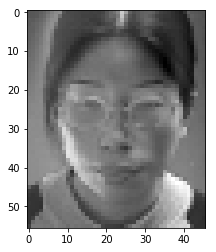

In [5]:
# Now let's subtract the mean face from all of our face images
print (pca_train, pca_train.shape)
print (avg_face, avg_face.shape)
pca_train_norm = pca_train-avg_face # works because of broadcasting
print (pca_train_norm, pca_train_norm.shape)
plt.imshow(np.reshape(pca_train_norm[0, :], (46,56)).T, cmap = 'gist_gray') 
# Show the first normalised face image and compare it to the previously printed image: not the same

pca_train_norm_transposed = pca_train_norm.T
print (pca_train_norm_transposed.shape)
# Computing the covariance matrix
cov = np.dot(pca_train_norm_transposed, pca_train_norm)
print (cov, cov.shape)
cov = cov/416
print (cov, cov.shape)

In [6]:
# Computing the eigenvalues and eigenvectors of the covariance matrix and measuring how long it takes

start = timeit.timeit()
eigvals, eigvecs = np.linalg.eig(cov) # these are not ordered, so we order them and the corresponding eigenvalues
end = timeit.timeit()
print (end-start)

print (eigvals, eigvals.shape)
print (eigvecs, eigvecs.shape)

eig_test_1 = np.dot(cov, eigvecs[:, 0])
eig_test_2 = eigvecs[:, 0]*eigvals[0]
print (eig_test_1, eig_test_1.shape)
print (eig_test_2, eig_test_2.shape)
print (eig_test_1-eig_test_2, (eig_test_1-eig_test_2).shape) # Checking them: they are basically zero, so the eigenvalue computation is good


-0.00023844800000016875
[9.27861679e+05+0.j 5.37311534e+05+0.j 4.24823560e+05+0.j ...
 2.02477805e-13+0.j 1.66254701e-13+0.j 2.32569856e-14+0.j] (2576,)
[[ 1.53621432e-02+0.j -1.14522813e-02+0.j -2.01161754e-02+0.j ...
   3.01872211e-03+0.j -3.40448132e-03+0.j  4.60762450e-03+0.j]
 [ 1.70411702e-02+0.j -1.19692735e-02+0.j -2.19453412e-02+0.j ...
   1.66948078e-06+0.j  7.79390065e-05+0.j  1.13002271e-03+0.j]
 [ 1.72894842e-02+0.j -1.18152768e-02+0.j -2.36234760e-02+0.j ...
   3.85834097e-04+0.j -3.64455702e-04+0.j  1.02391139e-04+0.j]
 ...
 [-6.05732931e-03+0.j  4.75261160e-02+0.j  4.12083560e-03+0.j ...
  -8.34229205e-03+0.j  2.41914557e-03+0.j -7.78013905e-03+0.j]
 [-5.74809915e-03+0.j  4.78096505e-02+0.j  4.20476566e-03+0.j ...
  -6.90271816e-03+0.j  6.72172790e-03+0.j  3.52766055e-03+0.j]
 [-5.48563087e-03+0.j  4.85183242e-02+0.j  5.52904360e-03+0.j ...
   1.93604457e-02+0.j -1.79861520e-02+0.j  2.36740857e-02+0.j]] (2576, 2576)
[14253.94403193+0.j 15811.84880064+0.j 16042.24982367+

[9.27861679e+05 5.37311534e+05 4.24823560e+05 ... 2.02477805e-13
 1.66254701e-13 2.32569856e-14] (2576,)
[[ 1.53621432e-02 -1.14522813e-02 -2.01161754e-02 ...  3.01872211e-03
  -3.40448132e-03  4.60762450e-03]
 [ 1.70411702e-02 -1.19692735e-02 -2.19453412e-02 ...  1.66948078e-06
   7.79390065e-05  1.13002271e-03]
 [ 1.72894842e-02 -1.18152768e-02 -2.36234760e-02 ...  3.85834097e-04
  -3.64455702e-04  1.02391139e-04]
 ...
 [-6.05732931e-03  4.75261160e-02  4.12083560e-03 ... -8.34229205e-03
   2.41914557e-03 -7.78013905e-03]
 [-5.74809915e-03  4.78096505e-02  4.20476566e-03 ... -6.90271816e-03
   6.72172790e-03  3.52766055e-03]
 [-5.48563087e-03  4.85183242e-02  5.52904360e-03 ...  1.93604457e-02
  -1.79861520e-02  2.36740857e-02]] (2576, 2576)
[415 418 420 ...   2   1   0] (2576,)
[  0   1   2 ... 420 418 415] (2576,)
[False False False ... False False False] (2576,)
0
927861.6794364735
[False False False ...  True  True  True] (2576,)
2161
[   0    1    2 ... 2573 2574 2575] (2576,)
[

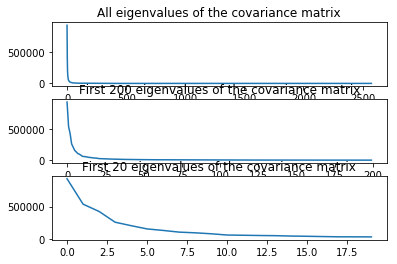

In [7]:
# take absolute value of the eigenvalues (complex eigenvalues are the result of calculation rounding errors)
eigvals = np.real(eigvals)
print (eigvals, eigvals.shape)
eigvecs = np.real(eigvecs)
print (eigvecs, eigvecs.shape)

# order them
print (eigvals.argsort(), eigvals.argsort().shape)
index = eigvals.argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector eigvals)
print (index, index.shape)
eigvals = eigvals[index]
eigvecs = eigvecs[:,index]

# How many zero eigenvalues do we have?
eig_zero = (eigvals == np.zeros(eigvals.shape))
print (eig_zero, eig_zero.shape)
print (eig_zero.sum())
# We don't have any precisely zero eigenvectors, but we can say that anything that is smaller than 1e-03 can be considered a zero eigenvector
# The order of difference between the largest eigenvalue and these is of the order of 8.
print (eigvals.max()) # Just to demonstrate the largest eigenvalue
eig_small = (eigvals <= np.ones(eigvals.shape)/1000)
print (eig_small, eig_small.shape)
print(eig_small.sum())
# So there are around 2161 eigenvalues that are zero

x = np.arange(0, 2576)
print (x, x.shape)
print (eigvals, eigvals.shape)

# plot them
plt.subplot(3, 1, 1)
plt.plot(x, eigvals) # clearly out of scale, so let's just take the first 200 of them
plt.title('All eigenvalues of the covariance matrix')

plt.subplot(3, 1, 2)
plt.plot(x[:200], eigvals[:200]) # still out of scale, so let's just take the first 20 of them
plt.title('First 200 eigenvalues of the covariance matrix')

plt.subplot(3, 1, 3)
plt.plot(x[:20], eigvals[:20])
plt.title('First 20 eigenvalues of the covariance matrix')
plt.show()

In [8]:
# We just keep the first n eigenvectors and eigenvalues

n = 2500
eigvecs_best = eigvecs[:, :n]
eigvals_best = eigvals[:n]
print (eigvecs_best, eigvecs_best.shape)
print (eigvals_best, eigvals_best.shape)

# Projecting each training data point to the space spanned by the eigenvectors
proj_pca_train_norm = np.zeros((416, n))
for i in range(416):
    proj_pca_train_norm [i, :] = np.dot(pca_train_norm[i, :], eigvecs_best)
    
print (proj_pca_train_norm, proj_pca_train_norm.shape)

# Now in array proj_pca_train_norm, in each row, we have the projected coordinates for each face image

[[ 0.01536214 -0.01145228 -0.02011618 ... -0.00377293 -0.00377293
  -0.00147191]
 [ 0.01704117 -0.01196927 -0.02194534 ... -0.00263747 -0.00263747
  -0.00173864]
 [ 0.01728948 -0.01181528 -0.02362348 ... -0.00252961 -0.00252961
  -0.00068779]
 ...
 [-0.00605733  0.04752612  0.00412084 ...  0.00773818  0.00773818
  -0.01748212]
 [-0.0057481   0.04780965  0.00420477 ...  0.01408275  0.01408275
   0.0133882 ]
 [-0.00548563  0.04851832  0.00552904 ... -0.02713533 -0.02713533
   0.00819166]] (2576, 2500)
[ 9.27861679e+05  5.37311534e+05  4.24823560e+05 ... -1.23942582e-11
 -1.23942582e-11 -1.25091663e-11] (2500,)
[[ 8.51661793e+01  1.12206945e+03  5.03892303e+02 ... -5.50670620e-14
  -5.50670620e-14  1.35003120e-13]
 [-5.98353303e+02  6.98174547e+02  7.30888257e+01 ...  5.56443780e-13
   5.56443780e-13 -3.89022148e-13]
 [ 4.72053938e+01 -5.27479030e+02  7.04922803e+02 ... -1.52766688e-13
  -1.52766688e-13 -1.61648472e-13]
 ...
 [ 3.54631474e+02 -1.86484660e+02 -4.34634064e+02 ...  1.9806378

[164. 162. 163. ...  35.  41.  46.] (2576,)


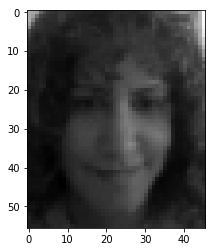

In [9]:
# Let's try to reconstruct one face image, just as a sanity check to see if it is still the same face (worse quality of course, because we did a lossy transformation on it)
face_check = avg_face + np.dot(eigvecs_best, proj_pca_train_norm[414, :])
print (face_check, face_check.shape)
plt.imshow(np.reshape(face_check, (46,56)).T, cmap = 'gist_gray')

Testing

In [10]:
# Now that we've trained our model, let's test it on our testing data set
# First, let's normalise the testing set (subtract the average face from all face images)

pca_test_norm = pca_test-avg_face # Works because of broadcasting
print (pca_test_norm, pca_test_norm.shape)

# Then let's project each testing image to the eigenspace (space spanned by the best eigenvectors)
proj_pca_test_norm = np.zeros((104, n))
for i in range(104):
    proj_pca_test_norm [i, :] = np.dot(pca_test_norm[i, :], eigvecs_best)

print (proj_pca_test_norm, proj_pca_test_norm.shape)

# Now in array proj_pca_test_norm, in each row, we have the projected coordinates for each face image

[[  0.19230769   8.73317308  21.73557692 ...  -1.83653846   1.13461538
  -15.73557692]
 [-25.80769231 -24.26682692 -31.26442308 ... -45.83653846 -44.86538462
  -42.73557692]
 [-63.80769231 -64.26682692 -62.26442308 ...  80.16346154  86.13461538
   87.26442308]
 ...
 [ 32.19230769 -20.26682692  12.73557692 ...   7.16346154   1.13461538
   -9.73557692]
 [-31.80769231 -31.26682692 -28.26442308 ...  18.16346154  13.13461538
   13.26442308]
 [-31.80769231 -30.26682692 -29.26442308 ...  82.16346154  89.13461538
   94.26442308]] (104, 2576)
[[ 1.02155850e+03 -1.10307097e+02 -7.98929693e+02 ...  3.95851710e-01
   3.95851710e-01  7.65962646e+00]
 [-7.46490948e+02 -1.46007938e+02  2.09050192e+02 ...  8.55181983e-01
   8.55181983e-01  1.28555362e+01]
 [-1.33874192e+03  1.02329197e+03  1.01675864e+03 ... -6.48060639e-01
  -6.48060639e-01 -1.09183296e+01]
 ...
 [ 1.52767211e+03 -8.38332980e+00 -7.25835038e+01 ... -7.42508706e+00
  -7.42508706e+00 -2.22358222e-01]
 [-2.78440767e+02  5.31080351e+02 -

[3109.95912579 2984.10518649 2832.42683296 3093.30531375 3055.89982886
 3343.27844549 3553.33727136 2791.50027119 2803.47940318 2993.99277956
 3091.98427617 3553.58519865 2880.27095324 3380.806082   1693.01705959
 2865.74261999 3522.00550313 3117.29253745 3316.13521498 3328.66320977
 2914.15026449 2739.03117252 2633.34858385 2712.61474671 2859.03860835
 2426.24004667 3403.96691583 2918.78669383 3502.31805581 2222.39730113
 2860.98685143 3799.20291167 2449.85341685 2482.11880539 2013.36851174
 2515.77418781 2402.17688026 3409.7590478  2818.44633869 2604.87480775
 2812.02182852 2977.57027861 2848.40337102 3195.63135609 2925.02440401
 2997.67189066 3648.12866605 2785.24860005 2876.86700493 2808.58501101
 2559.55616544 2510.83606873 2507.89109892 2718.71546214 3644.06953337
 2904.04197009 2561.23149365 2859.77617377 3009.4637004  3623.7753468
 2547.00741343 2792.54342205 2354.50584286 3308.78675107 3689.28675547
 3440.57520831 3475.23046201 3889.77451327 2543.11123706 2033.97142656
 2668.1

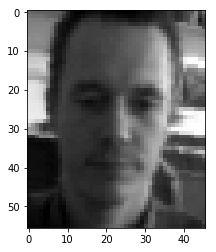

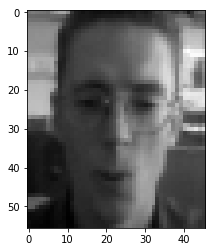

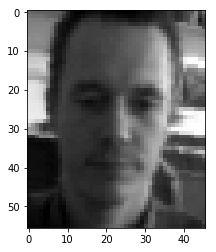

In [11]:
# Let's classify the first image
plt.imshow(np.reshape(pca_test[0, :], (46,56)).T, cmap = 'gist_gray')
plt.figure()

distances = np.zeros(416)

for i in range(416):
    distances[i] = np.linalg.norm(proj_pca_train_norm[i, :]-proj_pca_test_norm[0, :])
    
print (distances, distances.shape)

smallest_distance = distances.min()
smallest_index = distances.argmin()
print (smallest_distance, smallest_index)

# Which identity does it belong to according to the learning set?
print (training[smallest_index, 2576])
# Which identity does it actually belong to?
print (test[0, 2576])

# Print the picture that our picture is the closest to
plt.imshow(np.reshape(pca_train[smallest_index, :], (46,56)).T, cmap = 'gist_gray')
plt.figure()

# Print our actual image
plt.imshow(np.reshape(pca_test[0, :], (46,56)).T, cmap = 'gist_gray')

In [12]:
# Now let's do this for all of the testing images

distances = np.zeros((416, 104)) # In each row we store the distances (1 column = 1 testing image's distances)

for k in range (104):
    for i in range(416):
        distances[i, k] = np.linalg.norm(proj_pca_train_norm[i, :]-proj_pca_test_norm[k, :])
        
# Now we have in each column the distances of the testing images from each of the training images.
# Next step is to find the minimum of each column, and the corresponding row index (per column)
print (distances, distances.shape)

smallest_distance = distances.min(axis=0) # min per columns
smallest_index = distances.argmin(axis=0)
print (smallest_distance, smallest_distance.shape)
print (smallest_index, smallest_index.shape)

# Get the smallest distance image's label
#detected_label = np.zeros (104)
#for j in range(104):
#    detected_label[j] = training[smallest_index[j], 2576]
#print (detected_label, detected_label.shape)

actual_label = test [:, 2576].T

print (actual_label, actual_label.shape)


# Which identity does it belong to according to the learning set?
print (training[smallest_index, 2576], training[smallest_index, 2576].shape)

same = (training[smallest_index, 2576]==actual_label)

print (same, same.shape)

percentage = np.sum(same)/104

print (percentage)


[[3109.95912579 2879.1020734  2729.97929424 ... 3055.75510264
  2423.44088586 2630.16169808]
 [2984.10518649 2533.50365089 2302.3772382  ... 3290.15185779
  2140.29804636 2266.71316184]
 [2832.42683296 2669.3607379  2759.3562559  ... 2739.49434154
  2605.44309615 2659.83167852]
 ...
 [2621.23287101 2965.7998498  3214.06081881 ... 2630.48992534
  2410.63637392 2529.16953921]
 [3630.40999944 2723.93460807 3114.56737718 ... 4069.59386762
  2924.83208531 3153.01023755]
 [2595.96104825 2379.37990852 2668.24604319 ... 2983.94189745
  2111.81858294 2568.93179319]] (416, 104)
[1693.01705959 1607.84506376 1530.00063627 1196.67357605 1814.10205832
 1815.39669581  676.12128837 1040.51137782 1294.15298458 1128.13517083
 1700.52152484 1660.93412351 1810.37545501 1477.64619757 1512.2061587
 1789.0994224  1792.77471921 1300.28912815 1209.91244934 1508.53141226
 1818.25964283 1226.08300295 1483.30326371 1739.10527431 1333.71843748
 1747.9027573  1243.3660909  1389.7316713  1414.57029662  998.99620767


In [13]:
# Let's try to compute the eigenvalues using the low-dimensional method

# Computing the covariance matrix
cov2 = np.dot(pca_train_norm, pca_train_norm_transposed) 
print (cov2, cov2.shape) # as we can see it is NxN (and not DxD)
cov2 = cov2/416
print (cov2, cov2.shape)

[[ 4838244.39402852   250696.30989391  -670518.13962532 ...
   -608385.91606763 -2171377.17808686  -143793.44491378]
 [  250696.30989391  3054472.22575929   389501.77624006 ...
   -217026.00020225   384036.73777852   161285.4709516 ]
 [ -670518.13962532   389501.77624006  2611433.32672083 ...
    232322.55027852   508862.28825929  -791991.97856763]
 ...
 [ -608385.91606763  -217026.00020225   232322.55027852 ...
   2370195.77383621   239041.51181698  -200457.75500994]
 [-2171377.17808686   384036.73777852   508862.28825929 ...
    239041.51181698  5572324.24979775   366925.98297083]
 [ -143793.44491378   161285.4709516   -791991.97856763 ...
   -200457.75500994   366925.98297083  2563530.71614391]] (416, 416)
[[11630.39517795   602.63536032 -1611.82245102 ... -1462.46614439
  -5219.65667809  -345.6573195 ]
 [  602.63536032  7342.48131192   936.30234673 ...  -521.69711587
    923.16523504   387.70545902]
 [-1611.82245102   936.30234673  6277.48395846 ...   558.46766894
   1223.22665447 

In [43]:
# Computing the eigenvalues and eigenvectors of the covariance matrix and measure long long it takes

start2 = timeit.timeit()
eigvals2, eigvecs2 = np.linalg.eig(cov2) # these are not ordered, so we order them and the corresponding eigenvalues
end2 = timeit.timeit()
print (start2-end2)
print (start-end)

print (eigvals2, eigvals2.shape)
print (eigvecs2, eigvecs2.shape)

# Need to compare somehow to the eigenvalues and eigenvectors that we computed before. Atm we can see my inspection that they are the same.


#eig_test_1 = np.dot(cov, eigvecs[:, 0])
#eig_test_2 = eigvecs[:, 0]*eigvals[0]
#print (eig_test_1, eig_test_1.shape)
#print (eig_test_2, eig_test_2.shape)
#print (eig_test_1-eig_test_2, (eig_test_1-eig_test_2).shape) # Checking them: they are basically zero, so the eigenvalue computation is good


0.0033429879999857803
0.00023844800000016875
[9.27861679e+05 5.37311534e+05 4.24823560e+05 2.59605217e+05
 2.06186469e+05 1.56210045e+05 1.32991725e+05 1.06984599e+05
 9.63823553e+04 8.15250028e+04 6.23035993e+04 5.89824793e+04
 5.51426445e+04 5.23869151e+04 4.65390207e+04 4.31184091e+04
 3.86712060e+04 3.49762984e+04 3.46270466e+04 3.37056251e+04
 2.92470503e+04 2.56588055e+04 2.50350974e+04 2.42213541e+04
 2.34615952e+04 2.17750882e+04 2.06062389e+04 1.90879030e+04
 1.85815739e+04 1.81061649e+04 1.77261279e+04 1.69364310e+04
 1.60163770e+04 1.55921816e+04 1.49485384e+04 1.39899975e+04
 1.35738104e+04 1.29290087e+04 1.30870518e+04 1.23650826e+04
 1.19135343e+04 1.15474941e+04 1.13258696e+04 1.09383726e+04
 1.05585046e+04 1.03148945e+04 1.00348573e+04 9.66280250e+03
 9.42673520e+03 9.16732172e+03 9.01282301e+03 8.44911078e+03
 8.40169225e+03 8.22216461e+03 8.05670259e+03 7.97767515e+03
 7.53326491e+03 7.44197552e+03 7.26038560e+03 7.15721016e+03
 6.79389065e+03 6.65852064e+03 6.6008176

In [48]:
def highdimension():
    eigvals_hd, eigvecs_hd = np.linalg.eig(cov)
    return

#def lowdimension():
#    eigvals2_ld, eigvecs2_ld = np.linalg.eig(cov2)
#    return

def donothing():
    x=1123
    return

#mem_low = max(memory_usage(proc=lowdimension))
mem_high = max(memory_usage(proc=highdimension))
mem_nothing = max(memory_usage(proc=donothing))

#print("Maximum memory used by low dimension way: {0} MiB".format(str(mem_low)))
print("Maximum memory used by high dimension way: {0} MiB".format(str(mem_high)))
print("Maximum memory used by donothing: {0} MiB".format(str(mem_nothing)))

# Check it tomorrow, strange that the memory usage of donothing and lowdimension if the same, but don't know why yet

Maximum memory used by high dimension way: 638.03515625 MiB
Maximum memory used by donothing: 435.4453125 MiB
